In [2]:
%matplotlib inline

import glob
import os

import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 14
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.labelsize'] = 14

In [3]:
from astropy import constants as const
from astropy import units as u
from astropy.cosmology import Planck15
from astropy.cosmology import LambdaCDM
from astropy.cosmology import FlatwCDM 

In [4]:
Planck15.H0

<Quantity 67.74 km / (Mpc s)>

In [5]:
Planck15.Om0

0.3075

In [6]:
Planck15.Tcmb0

<Quantity 2.7255 K>

In [7]:
Planck15.Neff

3.046

In [8]:
Planck15.m_nu

<Quantity [ 0.  , 0.  , 0.06] eV>

In [9]:
Planck15.Ob0

0.0486

## Plank MCMC chains

In [10]:
r_fid = 149.7
H_057_fid = 96.8
D_A_057_fid = 1421

In [11]:
root = '/data/PLA/'
dataset = 'planck_lowl_lowLike_highL'

class PLA(object):
    def __init__(self, root, model, dataset):
        self.root = root
        self.model = model
        self.dataset = dataset
        self.name = '{}_{}'.format(model, dataset)
        
        self.param_names = []
        with open(self.path('.paramnames'), 'r') as infile:
            for line in infile:
                self.param_names.append(line.strip().split('\t'))
        self.param_names_df = pd.DataFrame(self.param_names, columns=['name', 'latex'])
        
        self.nchains = len(glob.glob(self.path('_[0-9].txt')))
        
        self.chains = []
        for i in range(self.nchains):
            self.chains.append(np.loadtxt(self.path('_{:d}.txt'.format(i + 1))))
        self.chains = np.vstack(self.chains)
        
        self.H0 = self.chains[:, 45]
        self.Ode0 = self.chains[:, 40]
        self.Om0 = self.chains[:, 41]
        self.Ob0 = self.chains[:, 2]/(self.H0/100.0)**2
        
        self.rdrag = self.chains[:, 58]
        self.H_057 = self.chains[:, 64] * const.c.to(u.km / u.s).value
        self.D_A_057 = self.chains[:, 65]

        self.alpha_para = H_057_fid / self.H_057 * (r_fid / self.rdrag)
        self.alpha_perp = self.D_A_057 / D_A_057_fid * (r_fid / self.rdrag)
        
        
    def toplevel(self):
        return os.path.join(self.root, self.model, self.dataset)
    
    def path(self, ext):
        return os.path.join(self.toplevel(), self.name + ext)

In [12]:
%%time
pla_base_omegak = PLA(root, 'base_omegak', dataset)

CPU times: user 5.01 s, sys: 76.5 ms, total: 5.09 s
Wall time: 5.11 s


In [13]:
%%time
pla_base_w = PLA(root, 'base_w', dataset)

CPU times: user 5.02 s, sys: 62.2 ms, total: 5.08 s
Wall time: 5.1 s


In [14]:
%%time
pla_base_mnu_Alens = PLA(root, 'base_mnu_Alens', dataset)

CPU times: user 6.21 s, sys: 89.1 ms, total: 6.3 s
Wall time: 6.44 s


/Users/Daniel/anaconda/envs/lyabao/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in divide


In [15]:
%%time
pla_base_nnu = PLA(root, 'base_nnu', dataset)

CPU times: user 7.36 s, sys: 108 ms, total: 7.46 s
Wall time: 7.51 s


In [16]:
pd.set_option('display.max_rows', 100)
# pd.reset_option('display.max_rows')

In [17]:
pla_base_omegak.param_names_df

,name,latex
0,omegabh2,\Omega_b h^2
1,omegach2,\Omega_c h^2
2,theta,100\theta_{MC}
3,tau,\tau
4,omegak,\Omega_K
5,ns,n_s
6,logA,{\rm{ln}}(10^{10} A_s)
7,aps100,A^{PS}_{100}
8,aps143,A^{PS}_{143}
9,aps217,A^{PS}_{217}


In [18]:
pla_base_omegak.nchains

8

In [19]:
pla_base_nnu.nchains

8

In [20]:
pla_base_omegak.chains.shape

(66222, 66)

In [21]:
pla_base_nnu.chains.shape

(97578, 66)

In [22]:
def plot_param(ax, pla, i, ioffset=-2):
    ax.hist(pla.chains[:, i], bins=50, normed=True)
    try: 
        xlabel = '${}$'.format(pla.param_names_df.iloc[i + ioffset]['latex'])
        ax.set_xlabel(xlabel, fontsize=16)
    except:
        pass
    # ax.set_ylabel('pdf', fontsize=16)
    ax.tick_params(labelsize=14)
    ax.grid(True)

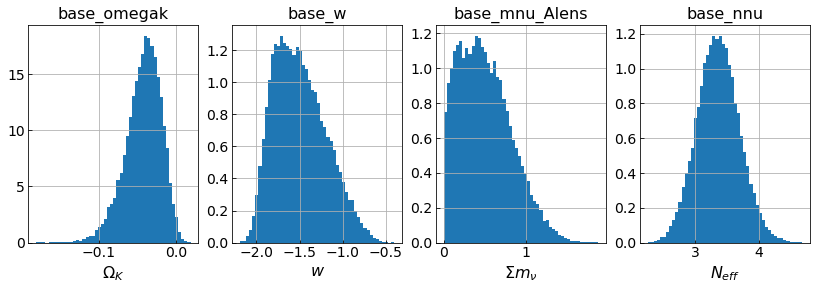

In [23]:
fig, axes = plt.subplots(ncols=4, figsize=(14, 4))

for ax, pla in zip(axes, (pla_base_omegak, pla_base_w, pla_base_mnu_Alens, pla_base_nnu)):
    plot_param(ax, pla, 6)
    ax.set_title(pla.model)

In [24]:
def plot_param_grid(pla, nrows=4, ncols=4, figsize=(12, 12)):
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 12))
    
    offset = pla.chains.shape[1] - nrows*ncols

    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]
            index = offset + (j + nrows*i)
            plot_param(ax, pla, index)
    
    plt.tight_layout()
    plt.show()

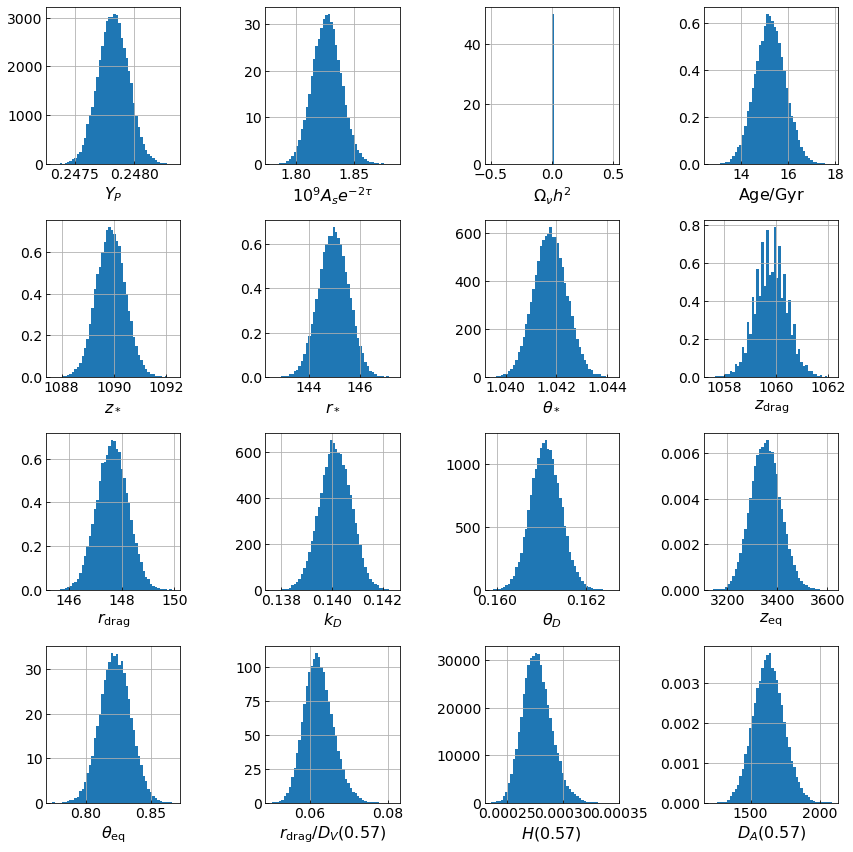

In [25]:
plot_param_grid(pla_base_omegak)

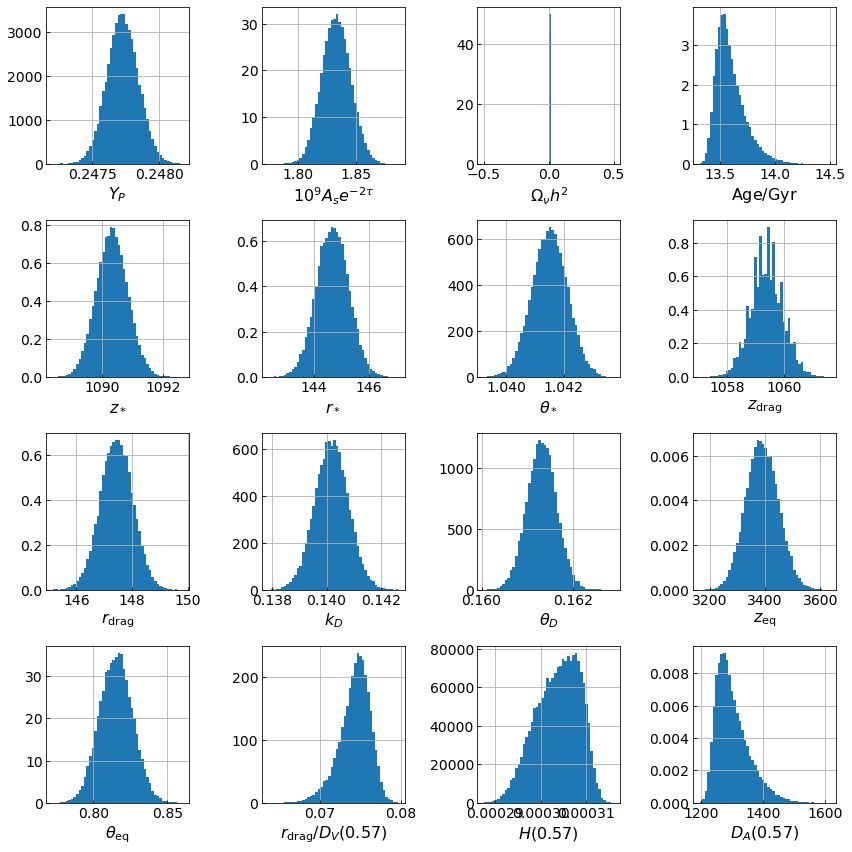

In [26]:
plot_param_grid(pla_base_w)

In [27]:
Omega_K = pla_base_omegak.chains[:, 6]

In [28]:
w = pla_base_w.chains[:, 6]

In [29]:
def get_levels(z, percentiles=[0.95, 0.68]):
    sorted_values = np.sort(z.flatten())[::-1]
    cumulative_values = np.cumsum(sorted_values)
    
    norm = cumulative_values[-1]
    
    indices = [np.argmax(cumulative_values > p*norm) for p in percentiles]
    imax = 0
    indices.append(imax)
    
    return [sorted_values[i] for i in indices]

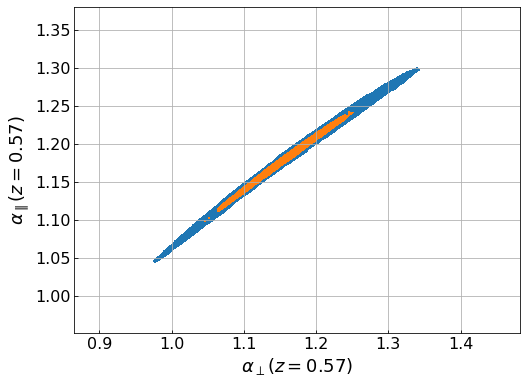

In [30]:
pla = pla_base_omegak

pdf, x_bin_edges, y_bin_egdes = np.histogram2d(
    pla.alpha_perp, pla.alpha_para, 
    bins=100, normed=True)
x_bin_widths = (x_bin_edges[1:] - x_bin_edges[:-1])[np.newaxis, :]
y_bin_widths = (y_bin_egdes[1:] - y_bin_egdes[:-1])[:, np.newaxis]

normed_pdf = pdf*x_bin_widths*y_bin_widths

X = 0.5*(x_bin_edges[1:] + x_bin_edges[:-1])
Y = 0.5*(y_bin_egdes[1:] + y_bin_egdes[:-1])
Z = normed_pdf.T

levels = get_levels(normed_pdf)

fig, ax = plt.subplots(figsize=(8, 6))

contour = ax.contourf(
    X, Y, Z, levels=levels, 
    origin="lower", colors=['C0', 'C1'])

ax.set_xlabel(r'$\alpha_\perp (z = 0.57)$', size=18)
ax.set_ylabel(r'$\alpha_\parallel (z = 0.57)$', size=18)

ax.tick_params(labelsize=16)

ax.grid()

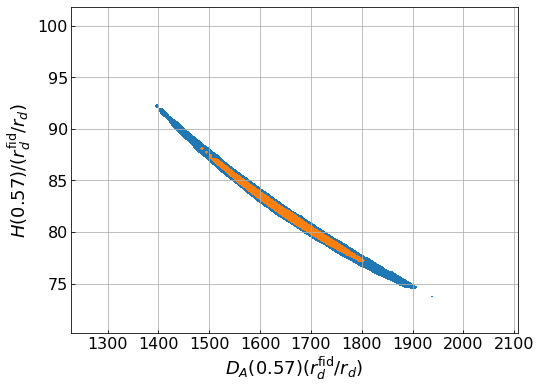

In [31]:
pla = pla_base_omegak

pdf, x_bin_edges, y_bin_egdes = np.histogram2d(
    pla.alpha_perp * D_A_057_fid, H_057_fid / pla.alpha_para, 
    bins=100, normed=True)
x_bin_widths = (x_bin_edges[1:] - x_bin_edges[:-1])[np.newaxis, :]
y_bin_widths = (y_bin_egdes[1:] - y_bin_egdes[:-1])[:, np.newaxis]

normed_pdf = pdf*x_bin_widths*y_bin_widths

X = 0.5*(x_bin_edges[1:] + x_bin_edges[:-1])
Y = 0.5*(y_bin_egdes[1:] + y_bin_egdes[:-1])
Z = normed_pdf.T

levels = get_levels(normed_pdf)

fig, ax = plt.subplots(figsize=(8, 6))

contour = ax.contourf(X, Y, Z, levels=levels, origin="lower", colors=['C0', 'C1'])

ax.set_xlabel(r'$D_A(0.57) (r_d^{\rm{fid}} / r_d)$', size=18)
ax.set_ylabel(r'$H(0.57) / (r_d^{\rm{fid}} / r_d)$', size=18)

ax.tick_params(labelsize=16)

ax.grid()

In [32]:
%%time

pla = pla_base_omegak

n = len(pla.chains)
z = 2.34

omegak_DH_234_over_rd = np.zeros(n)
omegak_DM_234_over_rd = np.zeros(n)

for i in range(n):
    cosmo = LambdaCDM(H0=pla.H0[i], Om0=pla.Om0[i], Ode0=pla.Ode0[i], 
                      Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu, Ob0=pla.Ob0[i])
    omegak_DH_234_over_rd[i] = (const.c.to(u.km / u.s) / cosmo.H(z) / (pla.rdrag[i] * u.Mpc))
    omegak_DM_234_over_rd[i] = cosmo.angular_diameter_distance(z) / (pla.rdrag[i] * u.Mpc)

CPU times: user 2min 26s, sys: 1.89 s, total: 2min 28s
Wall time: 2min 27s


In [33]:
%%time

pla = pla_base_w

n = len(pla.chains)
z = 2.34

w_DH_234_over_rd = np.zeros(n)
w_DM_234_over_rd = np.zeros(n)

for i in range(n):
    cosmo = FlatwCDM(H0=pla.H0[i], Om0=pla.Om0[i], w0=pla_base_w.chains[i, 6], 
                     Tcmb0=Planck15.Tcmb0, Neff=Planck15.Neff, m_nu=Planck15.m_nu, Ob0=pla.Ob0[i])
    w_DH_234_over_rd[i] = (const.c.to(u.km / u.s) / cosmo.H(z) / (pla.rdrag[i] * u.Mpc))
    w_DM_234_over_rd[i] = cosmo.angular_diameter_distance(z) / (pla.rdrag[i] * u.Mpc)

CPU times: user 2min 22s, sys: 2 s, total: 2min 24s
Wall time: 2min 23s


In [34]:
omegak_z057_constraints = (
    (const.c.to(u.km / u.s).value / pla_base_omegak.H_057) / pla_base_omegak.rdrag,
    pla_base_omegak.D_A_057 / pla_base_omegak.rdrag
)
omegak_z234_constraints = (
    omegak_DH_234_over_rd,
    omegak_DM_234_over_rd
)

w_z057_constraints = (
    (const.c.to(u.km / u.s).value / pla_base_w.H_057) / pla_base_w.rdrag,
    pla_base_w.D_A_057 / pla_base_w.rdrag
)
w_z234_constraints = (
    w_DH_234_over_rd,
    w_DM_234_over_rd
)

In [35]:
def plot_DM_DH(axes, z057_constraints, z234_constraints, color, name, cmap='rainbow'):
    
    cm = plt.cm.get_cmap(cmap)

    ax = axes[0]

    ax.scatter(z057_constraints[1], z057_constraints[0], c=color, marker=',', s=1, cmap=cm)
    
    pdf, x_bin_edges, y_bin_egdes = np.histogram2d(
        z057_constraints[1], z057_constraints[0], 
        bins=30, normed=True)
    x_bin_widths = (x_bin_edges[1:] - x_bin_edges[:-1])[np.newaxis, :]
    y_bin_widths = (y_bin_egdes[1:] - y_bin_egdes[:-1])[:, np.newaxis]

    normed_pdf = pdf*x_bin_widths*y_bin_widths

    X = 0.5*(x_bin_edges[1:] + x_bin_edges[:-1])
    Y = 0.5*(y_bin_egdes[1:] + y_bin_egdes[:-1])
    Z = normed_pdf.T

    levels = get_levels(normed_pdf)

    contour = ax.contour(X, Y, Z, levels=levels, origin='lower', colors='white')

    ax.set_ylim(20.4, 22.9)
    ax.set_xlim(8., 10.6)

    ax.set_ylabel(r'$D_H(z=0.57) / r_d$', size=18)
    ax.set_xlabel(r'$D_M(z=0.57) / r_d$', size=18)
    ax.tick_params(labelsize=16, direction='in')

    ax.grid(True)

    ax = axes[1]
    
    ax.scatter(z234_constraints[1], z234_constraints[0], c=color, marker=',', s=1, cmap=cm)
    
    pdf, x_bin_edges, y_bin_egdes = np.histogram2d(
        z234_constraints[1], z234_constraints[0], 
        bins=30, normed=True)
    x_bin_widths = (x_bin_edges[1:] - x_bin_edges[:-1])[np.newaxis, :]
    y_bin_widths = (y_bin_egdes[1:] - y_bin_egdes[:-1])[:, np.newaxis]

    normed_pdf = pdf*x_bin_widths*y_bin_widths

    X = 0.5*(x_bin_edges[1:] + x_bin_edges[:-1])
    Y = 0.5*(y_bin_egdes[1:] + y_bin_egdes[:-1])
    Z = normed_pdf.T

    levels = get_levels(normed_pdf)

    contour = ax.contour(X, Y, Z, levels=levels, origin='lower', colors='white')

    ax.set_ylim(8.3, 9.3)
    ax.set_xlim(10.7, 13.2)
    
    ax.set_ylabel(r'$D_H(z=2.34) / r_d$', size=18)
    ax.set_xlabel(r'$D_M(z=2.34) / r_d$', size=18)
    ax.tick_params(labelsize=16, direction='in')

    ax.grid(True)

    ax = axes[2]

    n, bins, patches = ax.hist(color, bins=100, normed=1)
    bin_centers = 0.5*(bins[:-1] + bins[1:])

    # scale values to interval [0,1]
    col = bin_centers - min(bin_centers)
    col /= max(col)

    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))

    ax.tick_params(labelsize=16, direction='in')
    ax.grid(True)
    ax.yaxis.set_ticklabels([])
    ax.set_xlabel(name, size=18)

In [36]:
from matplotlib.patches import Ellipse

def draw_measurement_contours(ax, (x, sigma_x), (y, sigma_y), r_off):
    cov = np.array([
        [sigma_x**2, r_off*sigma_x*sigma_y], 
        [r_off*sigma_x*sigma_y, sigma_y**2]
    ])
    eig_vals, eig_vecs = np.linalg.eig(cov)
    angle = np.rad2deg(np.arctan2(eig_vecs[0,1], eig_vecs[1,0]))
    angle = np.degrees(np.arctan2(*eig_vecs[:,0][::-1]))
    
    ax.scatter(x, y, color='k')

    for j in xrange(1, 4):
        ell = Ellipse(xy=(x, y),
                      width=np.sqrt(eig_vals[0])*j*2, 
                      height=np.sqrt(eig_vals[1])*j*2,
                      angle=angle,
                      color='k', zorder=9)
        ell.set_facecolor('none')
        ax.add_artist(ell)

In [37]:
def plot_bao_measurements(axes):
    
    ax = axes[0]

    x, sigma_x = 14.945/(1 + 0.57), 0.210/(1 + 0.57)
    y, sigma_y = 20.75, 0.73
    r_off = -0.52

    draw_measurement_contours(ax, (x, sigma_x), (y, sigma_y), r_off)

    ax = axes[1]

    x, sigma_x = 36.489/(1 + 2.34), 1.152/(1 + 2.34)
    y, sigma_y = 9.145, 0.204
    r_off = -0.48

    draw_measurement_contours(ax, (x, sigma_x), (y, sigma_y), r_off)

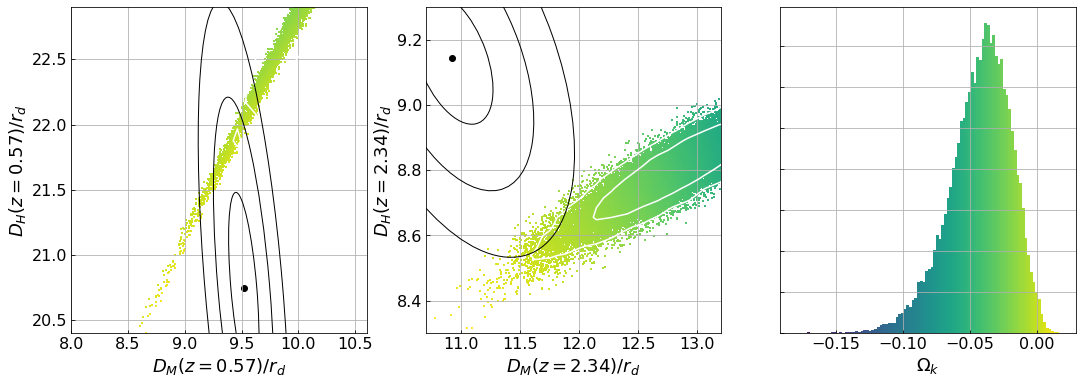

In [38]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

plot_DM_DH(axes, omegak_z057_constraints, omegak_z234_constraints, 
           Omega_K, r'$\Omega_k$', 'viridis')
plot_bao_measurements(axes)

plt.savefig('base_omegak.png', dpi=200, bbox_inches='tight')

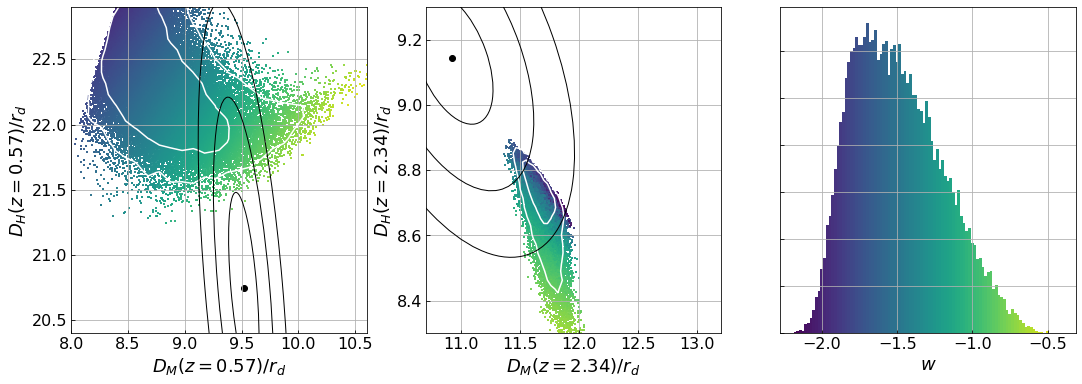

In [39]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

plot_DM_DH(axes, w_z057_constraints, w_z234_constraints, 
           w, r'$w$', 'viridis')
plot_bao_measurements(axes)

plt.savefig('base_w.png', dpi=200, bbox_inches='tight')